### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Summer 2019 ###

# Implement Optimization in Smartphone Supply Chain Problem #

#### Zihao Chen (zchen565@wisc.edu), Jinxin Tao (jtao34@wisc.edu), Ruijia Wang (rwang428@wisc.edu)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##


This project aims to implement optimization in supply chain decision making on suppliers selection and plant location selection. A mobile phone has an extremely complex supply chain that is basically made up of three areas: raw material extraction, component manufacture, assembly. In this project, we focus on the last two manufacture processes, model the decision making problems as quadratic programs and optimize the strategies in our settings.

Each smartphone on the planet is made up of a large and complex set of components, including processors, storage, sensors, communication chips, boards and much more. Given this complexity, smartphone manufacturers look to third-party vendors – hundreds of them – to supply the individual hardware components, and each of these suppliers may have its own sub-suppliers. The result is an immensely interdependent supply chain. And that’s before we get into the firmware and the upper layers of the smartphone stack.

For the component manufacture modeling part, a functional smartphone is modeled to be made up of a certain number of components. Each component has their own manufacture area where a specific number of suppliers produce the individual hardware components. Considering the fact that finding the right suppliers and resources diversely can actually lower costs and greatly reduce the risk of a single supplier going out of stock, we try to look for the balance of the number of orders among different suppliers. After we have the required components ready, we have to locate a place to assemble smartphone accessories in a target area to achieve minimum total cost with trasportation cost and assembly cost combined. A special area with government allowance is also considered and gives lower assembly cost. 

The purchasing prices for smartphone components are given on the internet. The number of vendors, number of demand,  locations and other parameters are reasonably assumed. After the number of orders from each supplier on a specific component are determined, those goods are considered to be placed at one predetermined spot no matter the number of suppliers chosen to simplify the problem.   

In the sections below, detailed math models, solution code, discussion of the results and conclusion of the project will be displayed.



![fixit flowchart][flow] 

[flow]: http://pages.cs.wisc.edu/~zihaoc/map.jpg

## 2. Mathematical model ##

**Decision Making on Suppliers Selection** 

**Type of the model**: The first part of the problem is a quadratic program.

**Variables**:
$x_{ij},  \forall i\in 1,2...,7, j\in S_i$ is the number of orders for each component $i$ from supplier $j$.

**Parameters**:

$N$ is the required number of each component and the numbers should be equal.

$\gamma_i$ is the defective rate for component $i$.

$\lambda$ is the penalty parameter of the variance.

$p_{ij}$ is the purchasing price for component $i$ from supplier $j$.

$Card(S_i)$ is the number of suppliers for component $i$.

**Constraints**:
The total number of orders for each component ($\sum_{j\in S_i} x_{ij}$, where $i= 1,2,...7$ is the component index) should be greater than the sum of the assigned demand ($N$) and the defective parts to meet the demand. The number of defects are determined by the defective rate $\lambda_i$ with respect to each component.
$$\sum_{j\in S_i} x_{ij}\geq N(1+\gamma_i), \forall i= 1,2...7, j\in S_i$$
Each order cannot be negative.
$$x_{ij}\geq 0, \forall i= 1,2...7, j\in S_i$$

**Objective**:
We want to minimize the sum of the purchase price from each supplier for every smartphone component with the tradeoff of the variance of the number of orders. Thus, there may exist the best supplier, however, to avoid the monopolization that may become a potential hazard in the future, we also want to balance the number of orders among available corporators.
$$\mathop{\min}\limits_{x_{ij}} \sum_{j\in S_i} x_{ij}p_{ij}+\lambda \sum_{i=1}^7 \sum_{j\in S_i}(x_{ij}-N(1+\gamma_i)/|S_i|)^2$$
where, $|S_i|$ is $Card(S_i)$, the number of suppliers for component $i$.

**Full math model**:
$$  \begin{aligned}
  & \underset{x_{ij}}{\text{min}}
  & & \sum_{j\in S_i} x_{ij}p_{ij}+\lambda \sum_{i=1}^7 \sum_{j\in S_i}(x_{ij}-N(1+\gamma_i)/|S_i|)^2 \\
  & \text{subject to}
  & & \sum_{j\in S_i} x_{ij}\geq N(1+\gamma_i), \forall i= 1,2...7, j\in S_i \\
  &&& x_{ij} \geq 0, \forall i= 1,2...7, j\in S_i \\
  \end{aligned}$$
  
**Assembly Plant Location Selection**

**Type of the model**: This part of the problem is a quadratic program.

**Variables**:
$(x, y)$， stands for the location of the assembly plant.

**Parameters**:

$(x_i, y_i), i= 1,2,..,7$ is the location of the component $i$.

$(x_a, y_a)$ is the coordinate of the center of the area where government offers allowance.

$C_i, i= 1,2,..,7$ is the specific transportation cost for $i$ component, respectively.

$p_{in}$ is the assembling price inside the allowance area.

$p_{out}$ is the assembling price created by locating the factory outside the allowance area. 

$d$ is the side length of square allowance area.

$R$ is the radius of assigned area where the plant should be located.

$N$ is the total number of demand.

![fixit flowchart][flow]

[flow]: http://pages.cs.wisc.edu/~zihaoc/budget.jpg






**Constraints**:
The plant either locates in the square area ($A_1$) where the government offers allowance or locates outside the square but in the circle due to restriction ($A_2$). However, the latter area is not convex, so we divide the area into four convex parts. 
The total five parts can be formulated as follows.
If locates in $A_1$,
$$|x-x_a|\leq d/2, |y-y_a|\leq d/2$$
If locates in $A_2$,
The first part $A_{21}$: $$x\geq x_a-d/2, y\geq y_a+d/2, (x-x_a)^2+(y-y_a)^2\leq R^2$$
The second part $A_{22}$: $$x\geq x_a+d/2, y\leq y_a+d/2, (x-x_a)^2+(y-y_a)^2\leq R^2$$
The third part $A_{23}$: $$x\leq x_a+d/2, y\leq y_a-d/2, (x-x_a)^2+(y-y_a)^2\leq R^2$$
The fourth part $A_{24}$: $$x\leq x_a-d/2, y\geq y_a-d/2, (x-x_a)^2+(y-y_a)^2\leq R^2$$

**Objective**:
We want to minimize the total cost by locating assembly plant wisely. The transportation cost which is proportion to the square of the distance, will be probably higher if we locate our plant in the government allowance area but we have to pay more on assembling if we locate elsewhere. We will find the best location on each part and compare the total cost. If the plant is located in allowance area, the objective is: $$\mathop{\min}\limits_{(x,y)\in A_1} \sum_{i=1}^7 C_i	[ \,(x-x_i)^2+(y-y_i)^2]\,+Np_{in}$$
If the plant is located elsewhere, the objective is: $$\mathop{\min}\limits_{(x,y)\in A_{2k}} \sum_{i=1}^7 C_i	[ \,(x-x_i)^2+(y-y_i)^2]\,+Np_{out}, \forall k= 1,2,3,4$$ where we set $p_{out}\geq p_{in}$.

**Full math model**:
Set $(x_a, y_a)=(0,0)$, for senario 1,
$$  \begin{aligned}
  & \underset{(x,y)\in A_1}{\text{min}}
  & & \sum_{i=1}^7 C_i	[ \,(x-x_i)^2+(y-y_i)^2]\,+Np_{in} \\
  & \text{subject to}
  & & x\leq d/2, \\
  &&& x\geq -d/2, \\
  &&& y\leq d/2, \\
  &&& y\geq -d/2, \\
  \end{aligned}$$
for senario 2,
$$  \begin{aligned}
  & \underset{(x,y)\in A_{21}}{\text{min}}
  & & \sum_{i=1}^7 C_i	[ \,(x-x_i)^2+(y-y_i)^2]\,+Np_{out} \\
  & \text{subject to}
  & & x\geq -d/2, \\
  &&& y\geq d/2, \\
  &&& x^2+y^2\leq R^2 \\
  \end{aligned}$$
for senario 3,
$$  \begin{aligned}
  & \underset{(x,y)\in A_{22}}{\text{min}}
  & & \sum_{i=1}^7 C_i	[ \,(x-x_i)^2+(y-y_i)^2]\,+Np_{out} \\
  & \text{subject to}
  & & x\geq d/2, \\
  &&& y\leq d/2, \\
  &&& x^2+y^2\leq R^2 \\
  \end{aligned}$$
for senario 4,
$$  \begin{aligned}
  & \underset{(x,y)\in A_{23}}{\text{min}}
  & & \sum_{i=1}^7 C_i	[ \,(x-x_i)^2+(y-y_i)^2]\,+Np_{out} \\
  & \text{subject to}
  & & x\leq d/2, \\
  &&& y\leq -d/2, \\
  &&& x^2+y^2\leq R^2 \\
  \end{aligned}$$

for senario 5,
$$  \begin{aligned}
  & \underset{(x,y)\in A_{24}}{\text{min}}
  & & \sum_{i=1}^7 C_i	[ \,(x-x_i)^2+(y-y_i)^2]\,+Np_{out} \\
  & \text{subject to}
  & & x\leq -d/2, \\
  &&& y\geq -d/2, \\
  &&& x^2+y^2\leq R^2 \\
  \end{aligned}$$

## 3. Solution ##

The solution is separated to two parts.
1.solve the suppliers problem on purchasing each component to minimize the total price.
2.find the best location to minimize the transportation and assembly cost.

For the suppliers selection problem, since the number of suppliers for each component is different, we cannot use two dimension array.
Instead, we use screen$[ \, ] \,$, camera$[ \, ] \,$,soc$[ \, ] \,$,ramrom$[ \, ] \,$, mainboard$[ \, ] \,$,sensor$[ \, ] \,$,battery$[ \, ] \,$ to represent the price proposed from each component suppliers.
We will need enough amount of each component and assembly them to meet the demand for finished product which is set to 1000000. The defective rate for each component is considered same regardless the suppliers. The penalty parameters for not balancing the purchaing amount among the available suppliers are different for different component.



In [38]:
using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))
#1000000 total
total = 1000000 #production phones 

#7 components
component =[:screen,:camera,:soc,:ramrom,:mainboard,:sensor,:battery]

#the price proposed by every possible supplier for each componets
#since the numbers of suppliers are different, we cannot use a matrix directly 
screen = [80,70,90,85]
camera = [20,18,23,25]
soc = [30,35,28]
ramrom = [40,43,45,35]
mainboard = [10,9,8,12,10.5]
sensor = [7,6.7,6.9,7.7,7.9,8]
battery = [5,4.5,4.7,5.9,5.5]

#number of suppliers for each component
supplier = Dict(zip(component, [4,4,3,4,5,6,5]))

#defective rate
#need extra production to grantee the total 
defective = Dict(zip(component, [0.4,0.2,0.05,0.1,0.1,0.05,0.1]))

#the real number we use in the following calculation
totaleach = Dict(zip(component, [0,0,0,0,0,0,0]))
for i = component
    totaleach[i] = total*(1+defective[i])
end


println(totaleach)
expectation = Dict(zip(component, [0,0,0,0,0,0,0]))
for i = component
    expectation[i] = totaleach[i]/supplier[i]
end

println(expectation)

@variable(m, screen_x[1:4] >= 0)
@variable(m, camera_x[1:4] >= 0)
@variable(m, soc_x[1:3] >= 0)
@variable(m, ramrom_x[1:4] >= 0)
@variable(m, mainboard_x[1:5] >= 0)
@variable(m, sensor_x[1:6] >= 0)
@variable(m, battery_x[1:5] >= 0)

#penalty for depending on several companies
lambda = Dict(zip(component,[0.00005, 0.00002,0.00006,0.00004,0.00001,0.00001,0.000005])) 

#fulfills the number of products each
@constraint(m, sum(screen_x[i] for i = 1:4)>= totaleach[:screen])
@constraint(m, sum(camera_x[i] for i = 1:4)>= totaleach[:camera])
@constraint(m, sum(soc_x[i] for i = 1:3)>= totaleach[:soc])
@constraint(m, sum(ramrom_x[i] for i = 1:4)>= totaleach[:ramrom])
@constraint(m, sum(mainboard_x[i] for i = 1:5)>= totaleach[:mainboard])
@constraint(m, sum(sensor_x[i] for i = 1:6)>= totaleach[:sensor])
@constraint(m, sum(battery_x[i] for i = 1:5)>= totaleach[:battery])

#screen_x[i]*screen[i] + lambda[:screen]*(sum((screen[i]-expectation[:screen])^2) for i = 1:4
#this is the cost of one component

println(lambda[:screen])
@objective(m, Min, 
     sum(screen_x[i]*screen[i] + lambda[:screen]*(screen_x[i]-expectation[:screen])^2 for i = 1:4)
    +sum(camera_x[i]*camera[i] + lambda[:camera]*(camera_x[i]-expectation[:camera])^2 for i = 1:4)
    +sum(soc_x[i]*soc[i] + lambda[:soc]*(soc_x[i]-expectation[:soc])^2 for i = 1:3)
    +sum(ramrom_x[i]*ramrom[i] + lambda[:ramrom]*(ramrom_x[i]-expectation[:ramrom])^2 for i = 1:4)
    +sum(mainboard_x[i]*mainboard[i] + lambda[:mainboard]*(mainboard_x[i]-expectation[:mainboard])^2 for i = 1:5)
    +sum(sensor_x[i]*sensor[i] + lambda[:sensor]*(sensor_x[i]-expectation[:sensor])^2 for i = 1:6)
    +sum(battery_x[i]*battery[i] + lambda[:battery]*(battery_x[i]-expectation[:battery])^2 for i = 1:5)
 )
solve(m)

println(getvalue(screen_x))
println(getvalue(camera_x))
println(getvalue(soc_x))
println(getvalue(ramrom_x))
println(getvalue(mainboard_x))
println(getvalue(sensor_x))
println(getvalue(battery_x))
println(getobjectivevalue(m))

Dict(:camera=>1200000,:screen=>1400000,:battery=>1100000,:sensor=>1050000,:ramrom=>1100000,:mainboard=>1100000,:soc=>1050000)
Dict(:camera=>300000,:screen=>350000,:battery=>220000,:sensor=>175000,:ramrom=>275000,:mainboard=>220000,:soc=>350000)
5.0e-5
Academic license - for non-commercial use only
[362500.0, 462500.0, 262500.0, 312500.0]
[337500.0, 387500.0, 262500.0, 212500.0]
[3.58333e5, 3.16667e5, 375000.0]
[284375.0, 246875.0, 221875.0, 346875.0]
[215000.0, 265000.0, 315000.0, 115000.0, 190000.0]
[1.93333e5, 2.08333e5, 1.98333e5, 1.58333e5, 1.48333e5, 1.43333e5]
[232000.0, 282000.0, 262000.0, 142000.0, 182000.0]
2.3892649583333337e8


For the assembly plant location selection problem, we need to set the location for each component because spare parts for each component are considered to be placed at one spot no matter the number of suppliers chosen to simplify the problem. We divide the target area into 5 parts to form 5 convex optimization problems and select the optimal location by comparison. 

In [39]:
using JuMP, Gurobi

#the location of the 7 components
x_pos = Dict(zip(component,[-180,200,400,300,230,-280,-500]))
y_pos = Dict(zip(component,[300,-260,250,430,380,600,-200]))

#the parameter for delivering each component
p = Dict(zip(component, [0.000002,0.000001,0.000001,0.000001,0.0000015,0.000001,0.00001]))

#to simplify the question, we choose the allowance center at (0,0)
allowance_x = 0
allowance_y = 0

l = 20 #l = d/2 in the introduction, to simplify the calculation
r = 100 #radius of the target area

price_in = 2 #the assembling price in the allowance area
price_out = 3 #the assembling price out side the square(allowance area), but inside the circle



3

The following part is to the best location in allowance area. 
The area is convex, so there will be an optimal.

In [40]:
m1 = Model(solver = GurobiSolver(OutputFlag = 0))
@variable(m1, x)
@variable(m1, y)
@constraint(m1, y<=20)
@constraint(m1, y>=-20)
@constraint(m1, x<=20)
@constraint(m1, x>=-20)
@objective(m1, Min, sum(((x-x_pos[i])^2 + (y-y_pos[i])^2)*p[i]*totaleach[i] for i = component)
    +total*price_in )

solve(m1)

println(getobjectivevalue(m1))
println(getvalue(x))
println(getvalue(y))

Academic license - for non-commercial use only
6.789345176322418e6
-20.0
16.14609571788413


The next four code cells calculated the four convex part.
Similarly, finding the best location for assembling.

In [41]:
m2 = Model(solver = GurobiSolver(OutputFlag = 0))
@variable(m2, x2)
@variable(m2, y2)

@constraint(m2, x2>=-20)
@constraint(m2, y2>= 20)
@constraint(m2, (x2-allowance_x)^2 + (y2-allowance_y)^2  <= r^2)

@objective(m2, Min, sum(((x2-x_pos[i])^2 + (y2-y_pos[i])^2)*p[i]*totaleach[i] for i = component) + price_out*total)

solve(m2)

println(getobjectivevalue(m2))
println(getvalue(x2))
println(getvalue(y2))

Academic license - for non-commercial use only
7.789640000000067e6
-20.00000000001737
20.000000000021394


In [42]:
m3 = Model(solver = GurobiSolver(OutputFlag = 0))
@variable(m3, x3)
@variable(m3, y3)

@constraint(m3, x3>=20)
@constraint(m3, y3<= 20)
@constraint(m3, (x3-allowance_x)^2 + (y3-allowance_y)^2  <= r^2)

@objective(m3, Min, sum(((x3-x_pos[i])^2 + (y3-y_pos[i])^2)*p[i]*totaleach[i] for i = component) + price_out*total)

solve(m3)

println(getobjectivevalue(m3))
println(getvalue(x3))
println(getvalue(y3))

Academic license - for non-commercial use only
8.183625176323161e6
20.000000000061128
16.146156336791197


In [43]:
m4 = Model(solver = GurobiSolver(OutputFlag = 0))
@variable(m4, x4)
@variable(m4, y4)

@constraint(m4, x4<=20)
@constraint(m4, y4<= -20)
@constraint(m4, (x4-allowance_x)^2 + (y4-allowance_y)^2  <= r^2)

@objective(m4, Min, sum(((x4-x_pos[i])^2 + (y4-y_pos[i])^2)*p[i]*totaleach[i] for i = component) + price_out*total)

solve(m4)

println(getobjectivevalue(m4))
println(getvalue(x4))
println(getvalue(y4))

Academic license - for non-commercial use only
7.229255567372795e6
-97.97953122679836
-20.000015254087458


In [44]:
m5 = Model(solver = GurobiSolver(OutputFlag = 0))
@variable(m5, x5)
@variable(m5, y5)

@constraint(m5, x5<= -20)
@constraint(m5, y5>= -20)
@constraint(m5, (x5-allowance_x)^2 + (y5-allowance_y)^2  <= r^2)

@objective(m5, Min, sum(((x5-x_pos[i])^2 + (y5-y_pos[i])^2)*p[i]*totaleach[i] for i = component) + price_out*total)

solve(m5)

println(getobjectivevalue(m5))
println(getvalue(x5))
println(getvalue(y5))

Academic license - for non-commercial use only
7.194437988844871e6
-99.78922046655849
6.489337316425751


Combining these 5 parts, we can get the best location for minmum cost.
The final result is in the allowance area --6.789e6

## 4. Results and discussion ##

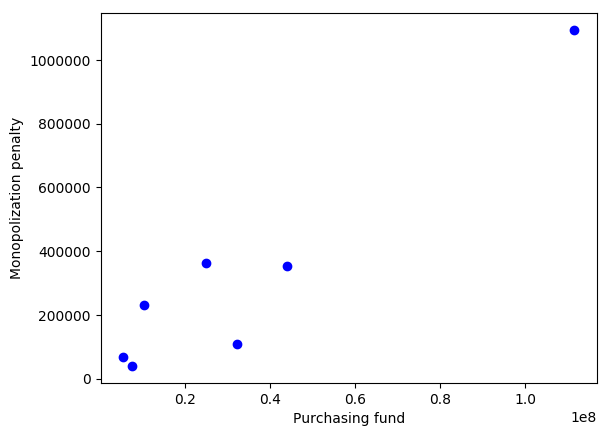

[362500.0, 462500.0, 262500.0, 312500.0]
[362500.0, 462500.0, 262500.0, 312500.0]
[337500.0, 387500.0, 262500.0, 212500.0]
[3.58333e5, 3.16667e5, 375000.0]
[284375.0, 246875.0, 221875.0, 346875.0]
[215000.0, 265000.0, 315000.0, 115000.0, 190000.0]
[1.93333e5, 2.08333e5, 1.98333e5, 1.58333e5, 1.48333e5, 1.43333e5]
[232000.0, 282000.0, 262000.0, 142000.0, 182000.0]
2.3892649583333337e8


In [45]:
using PyPlot
lambda = Dict(zip(component,[0.00005, 0.00002,0.00006,0.00004,0.00001,0.00001,0.000005])) 

cost_1 = zeros(7)
cost_2 = zeros(7)

cost_1[1] = sum(getvalue(screen_x[i])*screen[i] for i = 1:4)
cost_2[1] = sum(lambda[:screen]*(getvalue(screen_x[i])-expectation[:screen])^2 for i = 1:4)

cost_1[2] = sum(getvalue(camera_x[i])*camera[i] for i = 1:4)
cost_2[2] = sum(lambda[:camera]*(getvalue(camera_x[i])-expectation[:camera])^2 for i = 1:4)

cost_1[3] = sum(getvalue(soc_x[i])*soc[i] for i = 1:3)
cost_2[3] = sum(lambda[:soc]*(getvalue(soc_x[i])-expectation[:soc])^2 for i = 1:3)

cost_1[4] = sum(getvalue(ramrom_x[i])*ramrom[i] for i = 1:4)
cost_2[4] = sum(lambda[:ramrom]*(getvalue(ramrom_x[i])-expectation[:ramrom])^2 for i = 1:4)

cost_1[5] = sum(getvalue(mainboard_x[i])*mainboard[i] for i = 1:5)
cost_2[5] = sum(lambda[:mainboard]*(getvalue(mainboard_x[i])-expectation[:mainboard])^2 for i = 1:5)

cost_1[6] = sum(getvalue(sensor_x[i])*sensor[i] for i = 1:6)
cost_2[6] = sum(lambda[:sensor]*(getvalue(sensor_x[i])-expectation[:sensor])^2 for i = 1:6)

cost_1[7] = sum(getvalue(battery_x[i])*battery[i] for i = 1:5)
cost_2[7] = sum(lambda[:battery]*(getvalue(battery_x[i])-expectation[:battery])^2 for i = 1:5)

println(getvalue(screen_x))

xlabel("Purchasing fund"); ylabel("Monopolization penalty");
scatter( cost_1, cost_2, color="blue")
println(getvalue(screen_x))
println(getvalue(camera_x))
println(getvalue(soc_x))
println(getvalue(ramrom_x))
println(getvalue(mainboard_x))
println(getvalue(sensor_x))
println(getvalue(battery_x))
println(getobjectivevalue(m))

Purchasing fund represents the total number of cost for each component while the monopolization penalty is the variance for each component multiplied by a tradeoff value $\lambda$. The above plot shows the optimal result for each component with respect to purchasing fund and monopolization penalty. The values shown above are the number of components that should be purchased from each supplier. 

Since our penalty parameter is a vector, it is not convenient to display a sensitivity analysis result, however when we built the model, we found that only if we increase the magnitude of the penalty parameter $\lambda$, the number of components that we should purchase from each suppliers become close. To better model the monopolization penalty, one should consider the number of suppliers instead of the purchasing number variance. That is also a limitation of our model.

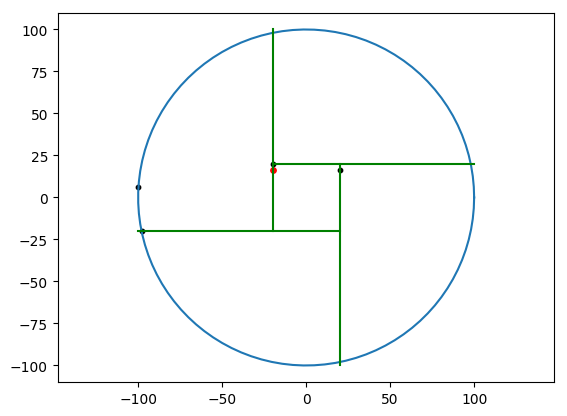

PyObject <matplotlib.collections.PathCollection object at 0x13bde1dd0>

In [46]:
using PyPlot
t = linspace(0,2pi,100) # parameter that traverses the circle 
plot( 0 + 100*cos.(t), 0 + 100*sin.(t)) # plot circle radius r with center (x1,x2) 

axis("equal"); # make x and y scales equal

npts = 100
xfine = linspace(-l,r,npts)
yfine = xfine*0 +l
plot( xfine, yfine, "g-")

xfine = linspace(-r,l,npts)
yfine = xfine*0 -l
plot( xfine, yfine, "g-")

yfine = linspace(-r,l,npts)
xfine = yfine*0 +l
plot( xfine, yfine, "g-")

yfine = linspace(-l,r,npts)
xfine = yfine*0 -l
plot( xfine, yfine, "g-")

scatter(getvalue(x),getvalue(y), color="red", s=15)
scatter(getvalue(x2),getvalue(y2), color="black", s=10)
scatter(getvalue(x3),getvalue(y3), color="black", s=10)
scatter(getvalue(x4),getvalue(y4), color="black", s=10)
scatter(getvalue(x5),getvalue(y5), color="black", s=10)

The round circle is the target area to build up the assembly plant. The square in the circle is the area with allowance while the other four parts have penalty on the assembly cost. Five different points are generated to show the optimal spot to build the plant in each part. By comparison shown above, the red point is the optimal point to build the plant which is in the allowance area. Again, the minimum cost and optimal point coordinates are:

In [47]:
println(getobjectivevalue(m1))
println(getvalue(x))
println(getvalue(y))

6.789345176322418e6
-20.0
16.14609571788413


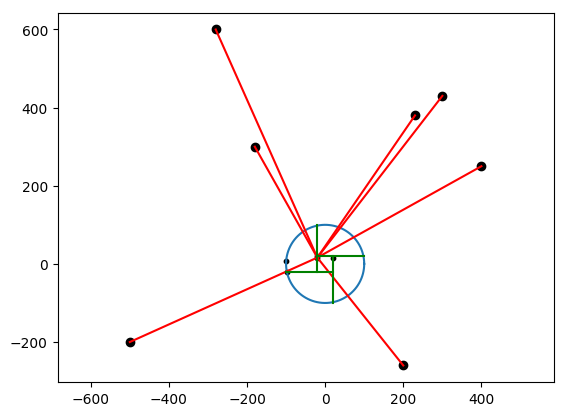

PyObject <matplotlib.collections.PathCollection object at 0x13bf76c10>

In [48]:
using PyPlot
x_pos =[-180,200,400,300,230,-280,-500]
y_pos =[300,-260,250,430,380,600,-200]

scatter( x_pos, y_pos, color="black") # plot the 50 points 
t = linspace(0,2pi,100) # parameter that traverses the circle 
plot( 0 + 100*cos.(t), 0 + 100*sin.(t)) # plot circle radius r with center (x1,x2) 

axis("equal"); # make x and y scales equal

npts = 100
for i = 1:7
    xfine = linspace(x_pos[i], getvalue(x), npts)
    yfine = (xfine-getvalue(x))*(y_pos[i]-getvalue(y))/(x_pos[i]-getvalue(x))+getvalue(y)
    plot( xfine, yfine, "r-")
end
xfine = linspace(-l,r,npts)
yfine = xfine*0 +l
plot( xfine, yfine, "g-")

xfine = linspace(-r,l,npts)
yfine = xfine*0 -l
plot( xfine, yfine, "g-")

yfine = linspace(-r,l,npts)
xfine = yfine*0 +l
plot( xfine, yfine, "g-")

yfine = linspace(-l,r,npts)
xfine = yfine*0 -l
plot( xfine, yfine, "g-")

scatter(getvalue(x),getvalue(y), color="black", s=10)
scatter(getvalue(x2),getvalue(y2), color="black", s=10)
scatter(getvalue(x3),getvalue(y3), color="black", s=10)
scatter(getvalue(x4),getvalue(y4), color="black", s=10)
scatter(getvalue(x5),getvalue(y5), color="black", s=10)



We choose seven different black points representing the location of the seven different smartphone accessories. The red lines are the transportation routes used to ship each accessory to the overall optimal location for assembly. We found that the final location is not stable and change with the predetermined location of the seven component area. Also, if we scale down the allowance benifit a little bit, we can see the optimal plant location could be in the non-allowance area.  

Minimum integrated total cost: 2.39e8 + 6.79e6 = 2.4579e8.

## 5. Conclusion ##

Our project discusses the smartphone components purchasing strategies and plant location selection using quadratic programming. Our model takes market balance into consideration and values the variance of the order numbers from suppliers as a penalty. Furthermore, we consider our assembly plant location selection problem with government allowance policy intervention. For the purchasing strategies, our results show that we should split our budget on all the avaliable suppliers because of the relatively high penalty due to the variance of the order numbers among the suppliers. The results generally reflects the successful strategies that applied in iphone supply chain, which put emphasis on diversely finding suppliers and resources to avoid monopolization. The assembly plant location we choose in this case is in the allowance area since the benefit in that area is huge even if there is more transportation cost. However, in the future, if more tradeoffs are included and realistic terrain map is used, the problem will be more challenging and difficult to solve using area division and approximation.        